In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from torch.autograd import Variable

In [19]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 200

In [3]:
df = pd.read_csv('./ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
from sklearn import model_selection as ms
train_set, test_set = ms.train_test_split(df, test_size=0.25)
len(train_set), len(test_set)

(75627, 25209)

In [5]:
training_set = np.array(train_set, dtype = 'int')
testing_set = np.array(test_set, dtype = 'int')

In [6]:
num_users = df.userId.unique().shape[0]
num_items = df.movieId.unique().shape[0]
num_users, num_items

(610, 9724)

In [7]:
movie_movieId = df.movieId.unique().tolist()
movie_movieId.sort()
d = dict()
for i in range(0, len(movie_movieId)):
    d[movie_movieId[i]] = i

In [8]:
def user_item_matrix(data):
    ratings = np.zeros((num_users, num_items))
    for row in data.itertuples():
        ratings[row[1]-1, d[row[2]]] = row[3]
    return ratings

In [9]:
ratings = user_item_matrix(df)
train = user_item_matrix(train_set)
test = user_item_matrix(test_set)

In [10]:
train = torch.FloatTensor(train)
input = Variable(train).unsqueeze(0)
input.shape

torch.Size([1, 610, 9724])

In [11]:
train = torch.FloatTensor(train)
test = torch.FloatTensor(test)
input = Variable(train).unsqueeze(0)
target = input
torch_dataset = Data.TensorDataset(input, target)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

In [12]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_items, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 20)
        self.fc4 = nn.Linear(20, num_items)
        self.activation = nn.Sigmoid()
        self.activation_t = nn.Tanh()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation_t(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

In [13]:
net = Net()
loss_func = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=LR, betas=(0.9, 0.99))

In [14]:
loss_his = []
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(loader): 
        # for each training step
        output = net(b_x)  
        output[target == 0] = 0
        # get output for every net
        loss = loss_func(output, b_y)  # compute loss for every net
        opt.zero_grad()                # clear gradients for next train
        loss.backward()                # backpropagation, compute gradients
        opt.step()                     # apply gradients
        loss_his.append(loss.data.numpy())     # loss recoder
        print('Epoch: ', epoch, '| Step: ', step, '| train loss: ', loss.data.numpy())

Epoch:  0 | Step:  0 | train loss:  0.1723583
Epoch:  1 | Step:  0 | train loss:  0.16284505
Epoch:  2 | Step:  0 | train loss:  0.15371983
Epoch:  3 | Step:  0 | train loss:  0.14454582
Epoch:  4 | Step:  0 | train loss:  0.13526487
Epoch:  5 | Step:  0 | train loss:  0.1258189
Epoch:  6 | Step:  0 | train loss:  0.11621912
Epoch:  7 | Step:  0 | train loss:  0.10651051
Epoch:  8 | Step:  0 | train loss:  0.09676116
Epoch:  9 | Step:  0 | train loss:  0.087046176
Epoch:  10 | Step:  0 | train loss:  0.077450715
Epoch:  11 | Step:  0 | train loss:  0.06808608
Epoch:  12 | Step:  0 | train loss:  0.05907274
Epoch:  13 | Step:  0 | train loss:  0.05055981
Epoch:  14 | Step:  0 | train loss:  0.04269665
Epoch:  15 | Step:  0 | train loss:  0.035631064
Epoch:  16 | Step:  0 | train loss:  0.029491697
Epoch:  17 | Step:  0 | train loss:  0.024377426
Epoch:  18 | Step:  0 | train loss:  0.020307442
Epoch:  19 | Step:  0 | train loss:  0.017249169
Epoch:  20 | Step:  0 | train loss:  0.015114

Epoch:  167 | Step:  0 | train loss:  0.008764559
Epoch:  168 | Step:  0 | train loss:  0.008750137
Epoch:  169 | Step:  0 | train loss:  0.008737882
Epoch:  170 | Step:  0 | train loss:  0.008712377
Epoch:  171 | Step:  0 | train loss:  0.008705175
Epoch:  172 | Step:  0 | train loss:  0.008667415
Epoch:  173 | Step:  0 | train loss:  0.008645235
Epoch:  174 | Step:  0 | train loss:  0.008633391
Epoch:  175 | Step:  0 | train loss:  0.008617702
Epoch:  176 | Step:  0 | train loss:  0.00860562
Epoch:  177 | Step:  0 | train loss:  0.008592694
Epoch:  178 | Step:  0 | train loss:  0.0085784625
Epoch:  179 | Step:  0 | train loss:  0.00856883
Epoch:  180 | Step:  0 | train loss:  0.008558336
Epoch:  181 | Step:  0 | train loss:  0.008548065
Epoch:  182 | Step:  0 | train loss:  0.008537876
Epoch:  183 | Step:  0 | train loss:  0.008527402
Epoch:  184 | Step:  0 | train loss:  0.008516761
Epoch:  185 | Step:  0 | train loss:  0.008506684
Epoch:  186 | Step:  0 | train loss:  0.008496743
E

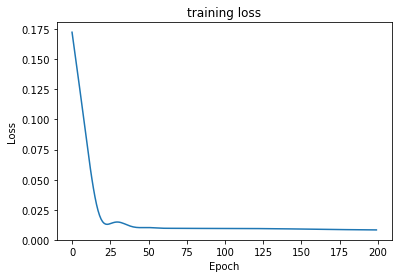

In [15]:
plt.plot(range(EPOCH), loss_his)
plt.title('training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
test_var = Variable(test).unsqueeze(0)
out = net(test_var)
out

tensor([[[3.7162, 3.1888, 2.9771,  ..., 3.0120, 3.1203, 3.9134],
         [4.1860, 3.6123, 3.4825,  ..., 3.4452, 3.4573, 4.5200],
         [4.1594, 3.5873, 3.4581,  ..., 3.4188, 3.4363, 4.4928],
         ...,
         [4.0424, 3.4853, 3.3263,  ..., 3.3155, 3.3572, 4.3315],
         [3.8762, 3.3319, 3.1525,  ..., 3.1566, 3.2341, 4.1315],
         [3.9696, 3.4200, 3.2480,  ..., 3.2486, 3.3055, 4.2374]]],
       grad_fn=<AddBackward0>)

In [17]:
out = out.detach().numpy()[0,:,:]

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_mse(pred, actual):
    # Ignore zero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, pred)
def get_mae(pred, actual):
    # Ignore zero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(actual, pred)

test = user_item_matrix(test_set)
print('Autoencoder RMSE: ' + str(math.sqrt(get_mse(out, test))))
print('Autoencoder MAE: ' + str(get_mae(out, test)))

Autoencoder RMSE: 1.211782239605736
Autoencoder MAE: 1.4684161962238933
